# Ling 450/807 SFU - Assignment 1

This assignment walks you through two different ways of extracting simple quotes from text and then directs you to a third, already implemented way. Your task is to enhance the simple methods or develop your own. For further instructions, check the assignment file on Canvas. 
The binder contains this notebook and some sample files.

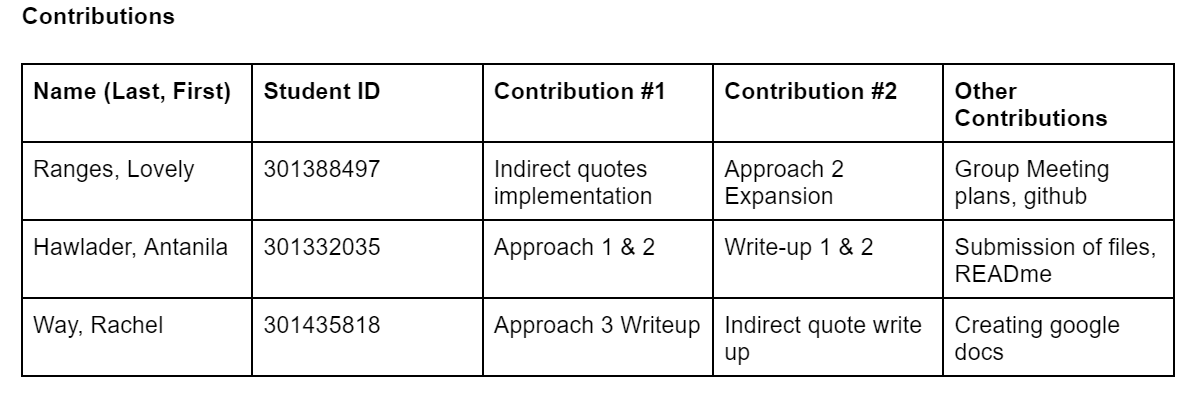

•	Describe the approach. What does the code do? 						
•	Describe the output. Does it do what you expected?					
•	Describe the output given the task. Does it capture all the direct quotes in the text? Why or why not? Does it capture things that are not direct quotes? Why or why not? 
•	If not all the direct quotes are captured, what is missing and how could you fix it? 

## Approach 1: Using regular expressions

At first, we import spacy, which is a natural language process (nlp) object which is a function to analyze the given text. Then we import re 'regular expression' which is a function which matches a particular string with the regular expression, usually it comes back as the same. The second code with open ("") as f is telling the system to return a file which we are going to read and analyze. When returning file we input encoding in order to encode or decode the file since some files have to be read as a specific encoding type. 'r' is for reading the file that exists.

In [106]:
import spacy
import re

In [108]:
# this loads and processes only one file at a time. You need to do 5 and comment on the results
# to load the 5 texts, you can just change the name of the file below or figure out a way 
# to pass a list of files to the read command. It's up to you

with open ("data/5c1dbe1d1e67d78e2797d611.txt", "r", encoding='utf-8') as f:
    text = f.read()

def is used to define a function in this case find_sents is returning sentences ffrom the text that is being retrieved by the file above. Then we create a doc object by processing a string of text with the nlp object and in this case we have chosen the file "data/5c1dbe1d1e67d78e2797d611.txt". We attempt to call the read() method for the variable file outside the with statementThe code will return with a list of sentences from the document. Then we use spacy.load to load en_core_web_sm is a trained pipline which enables spaCy to predict linguistics attriutes in context such as syntactic dependencies, named entities and parts of speech tags. However, this code is not going to process the text, it will only pull sentences from the text. The list(doc.sents) is a property used to iterate over the sentences in the document "data/5c1dbe1d1e67d78e2797d611.txt" we are analyzing.

In [109]:
def find_sents(text): 
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    sentences = list(doc.sents)
    return(sentences)

### Finding text within quotes

findall() function is extremely useful as it returns a list of strings containing all matches. the code set the pattern to ‘“(.+?)”’, where the single quotes represent the text body, while the double quotes represent the quotes within the text. We have the parenthesis which creates a capture group and .*? is a non-greedy moderator and only extracts the quotes and not the text between the quotes. The output is somewhat what we imagined. The sentences are extracted from the file we have pulled. It has specifically returned direct qoutes from the text.There were some few encoding errors which we noticed after taking a deeper look at the file.

In [110]:
def get_quotes(text):
    quotes = re.findall(r' "(.*?)"', text)
    return(quotes)

In [111]:
found_sents = find_sents(text)

In [112]:
# note: this just prints the text in quotes. If you want to save it locally
# to analyze how the 3 approaches are different, you need to run a command to save
# for instance to a text file

for sent in found_sents:
    str_sent = str(sent)
    found_quotes = get_quotes(str_sent)
    if len(found_quotes) > 0:
        print(found_quotes)

["Honestly, it feels like we're living our worst nightmare right now,"]
['I have no idea where that information came from because both Clark and I were there in the office with all of the workers from the orphanage.']
['the Government of Canada has obligations under international conventions to ensure children are not abducted, bought or sold, or removed from their biological families without legal consent.']
['in some cases, extra steps in the citizenship or immigration process may be needed to make sure the adoption meets all requirements of international adoption.']
["We're not giving up, but it feels really overwhelming to think about what this means and what they're trying to do to us right now,"]


I have looked at the data in the notepad that is stored in my desktop. The code did capture most the direct qoutes from the text. There are some direct codes which are questions and the code did not return those direct qoutes. Moreover, there is no further information on who said what qoutes. So, it is a bit hard to follow the storyline since the system only extracted direct codes from the file. I think there is some encoding issues which are not reading the file but it is not returning all the direct qoutes. It can be observed that direct codes in the file which ends with .". symbol seems to be returned with the output. 

## Approach 2: Using spaCy's Matcher

This approach is based on notebooks by Dr. W.J.B. Mattingly, http://spacy.pythonhumanities.com

Spacy's matcher produces a rules based matching engine and it operated based on tokens which can be accessed within the text. All matchers are processed using patterns which are already defined by the matcher. In this approach we first import the Matcher from spacy.matcher. Then we initialize the matcher Matcher(nlp.vocab) with the shared vocabulary using the document the code will operate on. This apporoach will process the texts, then find quotes and speakers from the data. Similarly like Approach 1 we had to load the text files using the proper encouding file and we input text = f.read () to order the code to read the text. Then we convert the text into a spacy doc in order to apply patterns or attributions. For instance, now we call matcher.add() with a pattern and an ID. In this case we are inputting pattern_n, part-of-speech tag (POS) more specifically Proper_Nouns so that we can find out who the speakers are of the found qoutes. We want to look at the proper nouns in the text.

The matcher returns a list of (match, doc[match[1]:match[2]]). Additionally, the match id(POS, PROPN) is the hash value of the string to get the string value of all the proper nouns from the documents. We read in the chapter that spaCy uses a hash function to calculate the hash based on a word string. The second output 1,2 2,3 6,7 is processing the string of the match id and maps to the span of the original document. 

The output returned based on what we imagined. However, we were still a bit surprised because we thought that the code will only return names of persons but we observed that it returned different entities like countries, cities, institutions etc. It did just capture all sorts of nouns. Furthermore, we observed that the match does not seem to return anything else except the assigned labels. 

In [5]:
# load all the stuff we'll need
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

## spaCy's Matcher
This notebook relies on spaCy's Matcher (see Advanced NLP with spaCy, [chapter 2](https://course.spacy.io/en/chapter2)). 

## Finding quotes and speakers

In [20]:
# load a text file. Remember, you have to do 5
with open ("data/5c1dbe1d1e67d78e2797d611.txt", "r", encoding='utf-8') as f:
    text = f.read()

In [21]:
# convert it to a spacy doc
doc = nlp(text)

### Finding proper nouns

In [22]:
# This is optional. It just tells you who are the people mentioned. You can use it later if you want to find out the speakers of the quotes

matcher = Matcher(nlp.vocab)
pattern_n = [{"POS": "PROPN"}]
matcher.add("PROPER_NOUNS", [pattern_n], greedy="LONGEST")
doc = nlp(text)
matches = matcher(doc)
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])
    
## You can try to extract full names by adding multi-word nouns, http://spacy.pythonhumanities.com/02_02_matcher.html

64
(3232560085755078826, 1, 2) CTV
(3232560085755078826, 2, 3) Vancouver
(3232560085755078826, 6, 7) Abbotsford
(3232560085755078826, 8, 9) B.C.
(3232560085755078826, 25, 26) Africa
(3232560085755078826, 42, 43) Kim
(3232560085755078826, 44, 45) Clark
(3232560085755078826, 45, 46) Moran
(3232560085755078826, 52, 53) Immigration
(3232560085755078826, 54, 55) Refugees


### Finding quotes

In [9]:
# a simple pattern to extract things in single quotes
# as with Approach 1, the for loop prints the results to the screen
# you can try and save it to a file if you want to compare with Approach 1 and 3

matcher = Matcher(nlp.vocab)
pattern_q = [{'ORTH': '"'}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': '"'}]
matcher.add("QUOTES", [pattern_q], greedy='LONGEST')
doc = nlp(text)
matches_q = matcher(doc)
matches_q.sort(key = lambda x: x[1])
print (len(matches_q))
for match in matches_q[:10]:
    print (match, doc[match[1]:match[2]])

3
(16432004385153140588, 115, 133) "The fact that we are being accused right now of an unethical adoption is crazy."
(16432004385153140588, 164, 174) "It does say that in the letter,"
(16432004385153140588, 179, 209) "I have no idea where that information came from because both Clark and I were there in the office with all of the workers from the orphanage."


## Approach 3: Implemented version
This approach was implemented by colleagues at the [Australian Text Analytics Platform](https://www.atap.edu.au/) (ATAP). The approach is based on the [Gender Gap Tracker](https://github.com/sfu-discourse-lab/GenderGapTracker) done in the Discourse Processing Lab here at SFU. 

The first link below leads you to a binder where you can load your own files and download the output. If you prefer to do everything in your own notebook, you can download/clone the project and you'll see a notebook there (quote_extractor_notebook.ipynb)

* [Binder link](https://github.com/Australian-Text-Analytics-Platform/quotation-tool/blob/workshop_01_20220908/README.md)
* [Regular GitHub project](https://github.com/Australian-Text-Analytics-Platform/quotation-tool)

Within the ATAP binder, upload 5 files from A1/data (the same you did for approaches 1 and 2), process them and download the results to your own computer. 

## Approach 1: More Observations



In [2]:
import spacy 
import re

In [3]:
#TEXT 2
with open ("data/5c4a89f31e67d78e27233c5d.txt", "r", encoding='utf-8') as f:
    text = f.read()
    
def find_sents(text): 
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    sentences = list(doc.sents)
    return(sentences)

def get_quotes(text):
    quotes = re.findall(r' "(.*?)"', text)
    return(quotes)

found_sents = find_sents(text)

for sent in found_sents:
    str_sent = str(sent)
    found_quotes = get_quotes(str_sent)
    if len(found_quotes) > 0:
        print(found_quotes)

['I came all the way from Syria, and I came here to thank you,']
["When we're faced with anxieties, it's very easy to have those fears drummed up and exacerbated — getting people to point fingers and lay blame,"]


In [4]:
#TEXT 3
with open ("data/5c5d37341e67d78e275dc30f.txt", "r", encoding='utf-8') as f:
    text = f.read()
    
def find_sents(text): 
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    sentences = list(doc.sents)
    return(sentences)

def get_quotes(text):
    quotes = re.findall(r' "(.*?)"', text)
    return(quotes)

found_sents = find_sents(text)

for sent in found_sents:
    str_sent = str(sent)
    found_quotes = get_quotes(str_sent)
    if len(found_quotes) > 0:
        print(found_quotes)

['[Gasol] is one of the best fives in the league for a long time now, perennial all-star, defensive player of the year,']
['Frustration, anger and helplessness']
["I'm back."]


In [5]:
#TEXT 4
with open ("data/5c3e11b11e67d78e27f2357a.txt", "r", encoding='utf-8') as f:
    text = f.read()
    
def find_sents(text): 
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    sentences = list(doc.sents)
    return(sentences)

def get_quotes(text):
    quotes = re.findall(r' "(.*?)"', text)
    return(quotes)

found_sents = find_sents(text)

for sent in found_sents:
    str_sent = str(sent)
    found_quotes = get_quotes(str_sent)
    if len(found_quotes) > 0:
        print(found_quotes)

['to date, we have not yet identified any issues regarding police officer conduct.']
['chaos all around.']
['unpredictable']
['the level of trust between the RCMP and the Hereditary Chiefs now in place will continue to play a direct and positive role going forward.']
["we're not there yet."]
['I believe there has to be trust built.']
['significantly scaled down presence, one that everyone is comfortable with.']


In [6]:
#TEXT 5
with open ("data/5c3f4e281e67d78e27f62b50.txt", "r", encoding='utf-8') as f:
    text = f.read()
    
def find_sents(text): 
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    sentences = list(doc.sents)
    return(sentences)

def get_quotes(text):
    quotes = re.findall(r' "(.*?)"', text)
    return(quotes)

found_sents = find_sents(text)

for sent in found_sents:
    str_sent = str(sent)
    found_quotes = get_quotes(str_sent)
    if len(found_quotes) > 0:
        print(found_quotes)

["We're not considering changing something in the legislation,"]
["We're confident in the legislation that we brought forward, that it finds the right balance in terms of being able to access medical assistance in dying, protecting the autonomy of individuals to make the appropriate decisions for themselves as well as protecting vulnerable individuals."]
["Our hope is for the country that the new justice minister will follow through on what he's already said and what he already knows that (the law) doesn't do enough for the most vulnerable people,"]
["Audrey's amendment,"]
['in an advanced stage of irreversible decline', 'reasonably foreseeable.']
['grievous and irremediable']


In [7]:
#TEXT 6
with open ("data/5c2994741e67d78e27b6d2ff.txt", "r", encoding='utf-8') as f:
    text = f.read()
    
def find_sents(text): 
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    sentences = list(doc.sents)
    return(sentences)

def get_quotes(text):
    quotes = re.findall(r' "(.*?)"', text)
    return(quotes)

found_sents = find_sents(text)

for sent in found_sents:
    str_sent = str(sent)
    found_quotes = get_quotes(str_sent)
    if len(found_quotes) > 0:
        print(found_quotes)

["I'm so excited and I am so honoured to be selected by you here,"]
['elected']
['Essentially, the leader will choose the candidate in each byelection,']
['whole country']


# Approach 2: More Observations 

In [8]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

with open ("data/5c4a89f31e67d78e27233c5d.txt", "r", encoding='utf-8') as f:
    text = f.read()
    
doc = nlp(text)

In [9]:
matcher = Matcher(nlp.vocab)
pattern_n = [{"POS": "PROPN"}]
matcher.add("PROPER_NOUNS", [pattern_n], greedy="LONGEST")
doc = nlp(text)
matches = matcher(doc)
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])

117
(3232560085755078826, 0, 1) MIRAMICHI
(3232560085755078826, 2, 3) N.B.
(3232560085755078826, 4, 5) Justin
(3232560085755078826, 5, 6) Trudeau
(3232560085755078826, 44, 45) Thursday
(3232560085755078826, 52, 53) New
(3232560085755078826, 53, 54) Brunswick
(3232560085755078826, 69, 70) Canada
(3232560085755078826, 79, 80) Syria
(3232560085755078826, 90, 91) Tasmeen


In [10]:
matcher = Matcher(nlp.vocab)
pattern_q = [{'ORTH': '"'}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': '"'}]
matcher.add("QUOTES", [pattern_q], greedy='LONGEST')
doc = nlp(text)
matches_q = matcher(doc)
matches_q.sort(key = lambda x: x[1])
print (len(matches_q))
for match in matches_q[:10]:
    print (match, doc[match[1]:match[2]])

2
(16432004385153140588, 206, 224) "Welcoming people who are trying to build a better life is what built this country,"
(16432004385153140588, 707, 719) "Obviously the Francophonie Games are deeply important to me,"


In [11]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

with open ("data/5c5d37341e67d78e275dc30f.txt", "r", encoding='utf-8') as f:
    text = f.read()
    
doc = nlp(text)

matcher = Matcher(nlp.vocab)
pattern_n = [{"POS": "PROPN"}]
matcher.add("PROPER_NOUNS", [pattern_n], greedy="LONGEST")
doc = nlp(text)
matches = matcher(doc)
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])
    
matcher = Matcher(nlp.vocab)
pattern_q = [{'ORTH': '"'}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': '"'}]
matcher.add("QUOTES", [pattern_q], greedy='LONGEST')
doc = nlp(text)
matches_q = matcher(doc)
matches_q.sort(key = lambda x: x[1])
print (len(matches_q))
for match in matches_q[:10]:
    print (match, doc[match[1]:match[2]])

128
(3232560085755078826, 1, 2) Toronto
(3232560085755078826, 2, 3) Raptors
(3232560085755078826, 15, 16) NBA
(3232560085755078826, 20, 21) Marc
(3232560085755078826, 21, 22) Gasol
(3232560085755078826, 24, 25) Memphis
(3232560085755078826, 25, 26) Grizzlies
(3232560085755078826, 27, 28) Jonas
(3232560085755078826, 28, 29) Valanciunas
(3232560085755078826, 30, 31) C.J.
2
(16432004385153140588, 137, 142) " VanVleet said. "
(16432004385153140588, 697, 702) " said Powell. "


In [12]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

with open ("data/5c3e11b11e67d78e27f2357a.txt", "r", encoding='utf-8') as f:
    text = f.read()
    
doc = nlp(text)

matcher = Matcher(nlp.vocab)
pattern_n = [{"POS": "PROPN"}]
matcher.add("PROPER_NOUNS", [pattern_n], greedy="LONGEST")
doc = nlp(text)
matches = matcher(doc)
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])
    
matcher = Matcher(nlp.vocab)
pattern_q = [{'ORTH': '"'}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': '"'}]
matcher.add("QUOTES", [pattern_q], greedy='LONGEST')
doc = nlp(text)
matches_q = matcher(doc)
matches_q.sort(key = lambda x: x[1])
print (len(matches_q))
for match in matches_q[:10]:
    print (match, doc[match[1]:match[2]])

66
(3232560085755078826, 0, 1) RCMP
(3232560085755078826, 24, 25) B.C.
(3232560085755078826, 29, 30) Gidimt'en
(3232560085755078826, 40, 41) Wet'suwet'en
(3232560085755078826, 49, 50) Coastal
(3232560085755078826, 50, 51) GasLink
(3232560085755078826, 65, 66) Prince
(3232560085755078826, 66, 67) George
(3232560085755078826, 68, 69) B.C.
(3232560085755078826, 75, 76) December
4
(16432004385153140588, 250, 256) "chaos all around."
(16432004385153140588, 398, 401) "unpredictable"
(16432004385153140588, 757, 785) "the level of trust between the RCMP and the Hereditary Chiefs now in place will continue to play a direct and positive role going forward."
(16432004385153140588, 800, 811) "I believe there has to be trust built."


In [13]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

with open ("data/5c3f4e281e67d78e27f62b50.txt", "r", encoding='utf-8') as f:
    text = f.read()
    
doc = nlp(text)

matcher = Matcher(nlp.vocab)
pattern_n = [{"POS": "PROPN"}]
matcher.add("PROPER_NOUNS", [pattern_n], greedy="LONGEST")
doc = nlp(text)
matches = matcher(doc)
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])
    
matcher = Matcher(nlp.vocab)
pattern_q = [{'ORTH': '"'}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': '"'}]
matcher.add("QUOTES", [pattern_q], greedy='LONGEST')
doc = nlp(text)
matches_q = matcher(doc)
matches_q.sort(key = lambda x: x[1])
print (len(matches_q))
for match in matches_q[:10]:
    print (match, doc[match[1]:match[2]])

77
(3232560085755078826, 0, 1) OTTAWA
(3232560085755078826, 5, 6) David
(3232560085755078826, 6, 7) Lametti
(3232560085755078826, 8, 9) Canada
(3232560085755078826, 22, 23) Trudeau
(3232560085755078826, 35, 36) Lametti
(3232560085755078826, 41, 42) Liberal
(3232560085755078826, 58, 59) Canadians
(3232560085755078826, 83, 84) Facebook
(3232560085755078826, 87, 88) Montreal
4
(16432004385153140588, 814, 827) "The real question is do we want more Audrey Parkers?"
(16432004385153140588, 882, 891) "in an advanced stage of irreversible decline"
(16432004385153140588, 907, 912) "reasonably foreseeable."
(16432004385153140588, 935, 940) "grievous and irremediable"


In [16]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

with open ("data/5c2994741e67d78e27b6d2ff.txt", "r", encoding='utf-8') as f:
    text = f.read()
    
doc = nlp(text)

matcher = Matcher(nlp.vocab)
pattern_n = [{"POS": "PROPN"}]
matcher.add("PROPER_NOUNS", [pattern_n], greedy="LONGEST")
doc = nlp(text)
matches = matcher(doc)
print (len(matches))
for match in matches[:10]:
    print (match, doc[match[1]:match[2]])
    
matcher = Matcher(nlp.vocab)
pattern_q = [{'ORTH': '"'}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': '"'}]
matcher.add("QUOTES", [pattern_q], greedy='LONGEST')
doc = nlp(text)
matches_q = matcher(doc)
matches_q.sort(key = lambda x: x[1])
print (len(matches_q))
for match in matches_q[:10]:
    print (match, doc[match[1]:match[2]])

94
(3232560085755078826, 0, 1) BURNABY
(3232560085755078826, 2, 3) B.C.
(3232560085755078826, 6, 7) Liberal
(3232560085755078826, 7, 8) party
(3232560085755078826, 20, 21) NDP
(3232560085755078826, 22, 23) Jagmeet
(3232560085755078826, 23, 24) Singh
(3232560085755078826, 29, 30) British
(3232560085755078826, 30, 31) Columbia
(3232560085755078826, 33, 34) Karen
3
(16432004385153140588, 126, 142) "My eyes are full of tears because I love this land so deeply,"
(16432004385153140588, 444, 447) "elected"
(16432004385153140588, 645, 649) "whole country"
